## Information data

| Features                 | Description                                                    |
|--------------------------|----------------------------------------------------------------|
| customer_city            | city of customer                                               |
| customer_country         | country of customer                                            |
| customer_fname           | first name of customer                                         |
| customer_id              | customer id                                                    |
| customer_segment         | customer segmentation                                          |
| customer_state           | state of customer                                              |
| customer_zipcode         | customer zipcode                                               |
| additional_order_items    | additional order item                                         |
| category_name            | category name                                                  |
| order_date               | date of order                                                  |
| customer_id              | customer id                                                    |
| market                   | market                                                         |
| order_id                 | order_id                                                       |
| order_region             | order region                                                   |
| order_quantity           | quantity of orders                                             |
| product_price            | product price                                                  |
| profit_margin            | profit margin (assumption: % (revenue - cost)/revenue)         |
| profit_per_order         | profit per order (assumption: revenue - cost)            

## Import Library

In [129]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [130]:
## Library for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Read data

In [131]:
customer = pd.read_csv("ecommerce_customer.csv")
customer

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0
1,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0
2,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
3,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
4,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0
...,...,...,...,...,...,...,...
115741,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115742,Upland,United States,Victoria,8100,Corporate,CA,91786.0
115743,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115744,Los Angeles,United States,Mary,9547,Corporate,CA,90027.0


In [132]:
order = pd.read_csv("ecommerce_order.csv")
order

,additional_order_items,category_name,customer_id,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Camping & Hiking,Camping & Hiking,568,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Camping & Hiking,Camping & Hiking,3341,LATAM,18-04-2017,57472,South America,1,299.980011,-5.40%,-16.200001
2,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,3.90%,11.620000
3,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,-1.10%,-3.390000
4,Hunting & Shooting,Hunting & Shooting,10740,LATAM,5/6/2017,58644,Central America,1,149.990005,-63.80%,-95.650002
...,...,...,...,...,...,...,...,...,...,...,...
115741,Water Sports,Water Sports,2666,USCA,13-04-2016,32105,US Center,1,199.990005,27.50%,55.090000
115742,Shop By Sport,Shop By Sport,8100,USCA,7/2/2016,37555,East of USA,1,39.990002,37.40%,14.940000
115743,Fishing,Fishing,2666,USCA,13-04-2016,32105,US Center,1,399.980011,39.80%,159.350006
115744,Fishing,Fishing,9547,USCA,8/6/2016,39980,West of USA,1,399.980011,24.90%,99.599998


##  Data Dictionary & Data Quality Assessment

### Merge data

In [133]:
df = pd.merge(customer,order, on='customer_id', how='inner')
df.head()

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,additional_order_items,category_name,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Indoor/Outdoor Games,Indoor/Outdoor Games,LATAM,17-06-2017,61558,South America,5,49.980000,31.30%,15.640000
2,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Men's Footwear,Men's Footwear,LATAM,17-06-2017,61558,South America,5,129.990005,30.10%,39.160000
3,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Kids' Golf Clubs,Kids' Golf Clubs,LATAM,17-06-2017,61558,South America,5,99.949997,-216.00%,-431.779999
4,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Women's Apparel,Women's Apparel,LATAM,17-06-2017,61558,South America,5,50.000000,13.90%,20.879999


In [134]:
df.shape

(1363790, 17)

### About data

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363790 entries, 0 to 1363789
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_city           1363790 non-null  object 
 1   customer_country        1363790 non-null  object 
 2   customer_fname          1363790 non-null  object 
 3   customer_id             1363790 non-null  int64  
 4   customer_segment        1363790 non-null  object 
 5   customer_state          1363790 non-null  object 
 6   customer_zipcode        1363787 non-null  float64
 7   additional_order_items  1351278 non-null  object 
 8   category_name           1363790 non-null  object 
 9   market                  1363790 non-null  object 
 10  order_date              1363790 non-null  object 
 11  order_id                1363790 non-null  int64  
 12  order_region            1363790 non-null  object 
 13  order_quantity          1363790 non-null  int64  
 14  pr

### Convert data types

In [136]:
df['customer_id'] = df['customer_id'].astype('object')
df['customer_zipcode'] = df['customer_zipcode'].astype('object')
df['order_id'] = df['order_id'].astype('object')

## profit_margin
df['profit_margin'] = df['profit_margin'].str.replace('%', '', regex=True)
df['profit_margin'] = df['profit_margin'].astype('float')
df['profit_margin'] = df['profit_margin']*0.01

## columns order_date
df['order_date'] = [date.replace('/', '-') for date in df['order_date']]

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363790 entries, 0 to 1363789
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_city           1363790 non-null  object 
 1   customer_country        1363790 non-null  object 
 2   customer_fname          1363790 non-null  object 
 3   customer_id             1363790 non-null  object 
 4   customer_segment        1363790 non-null  object 
 5   customer_state          1363790 non-null  object 
 6   customer_zipcode        1363787 non-null  object 
 7   additional_order_items  1351278 non-null  object 
 8   category_name           1363790 non-null  object 
 9   market                  1363790 non-null  object 
 10  order_date              1363790 non-null  object 
 11  order_id                1363790 non-null  object 
 12  order_region            1363790 non-null  object 
 13  order_quantity          1363790 non-null  int64  
 14  pr

In [138]:
df.describe()

,order_quantity,product_price,profit_margin,profit_per_order
count,1.363790e+06,1.363790e+06,1.363790e+06,1.363790e+06
mean,2.564190e+00,1.362323e+02,1.092501e-01,2.190630e+01
std,1.672060e+00,1.221883e+02,4.197312e-01,9.895700e+01
min,1.000000e+00,9.990000e+00,-2.750000e+00,-4.274980e+03
25%,1.000000e+00,5.000000e+01,6.200000e-02,7.600000e+00
50%,2.000000e+00,5.999000e+01,2.420000e-01,3.203000e+01
75%,4.000000e+00,1.999900e+02,3.360000e-01,6.427000e+01
max,5.000000e+00,1.999990e+03,5.000000e-01,9.118000e+02


In [139]:
df.nunique()

customer_city               563
customer_country              2
customer_fname              761
customer_id               18006
customer_segment              3
customer_state               46
customer_zipcode            995
additional_order_items       49
category_name                50
market                        5
order_date                  731
order_id                  42725
order_region                 23
order_quantity                5
product_price                75
profit_margin              1672
profit_per_order          19342
dtype: int64

## EDA

In [140]:
df.columns

Index(['customer_city', 'customer_country', 'customer_fname', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'additional_order_items', 'category_name', 'market', 'order_date',
       'order_id', 'order_region', 'order_quantity', 'product_price',
       'profit_margin', 'profit_per_order'],
      dtype='object')

In [141]:
df.nunique()

customer_city               563
customer_country              2
customer_fname              761
customer_id               18006
customer_segment              3
customer_state               46
customer_zipcode            995
additional_order_items       49
category_name                50
market                        5
order_date                  731
order_id                  42725
order_region                 23
order_quantity                5
product_price                75
profit_margin              1672
profit_per_order          19342
dtype: int64

### The number of customers by country and segment

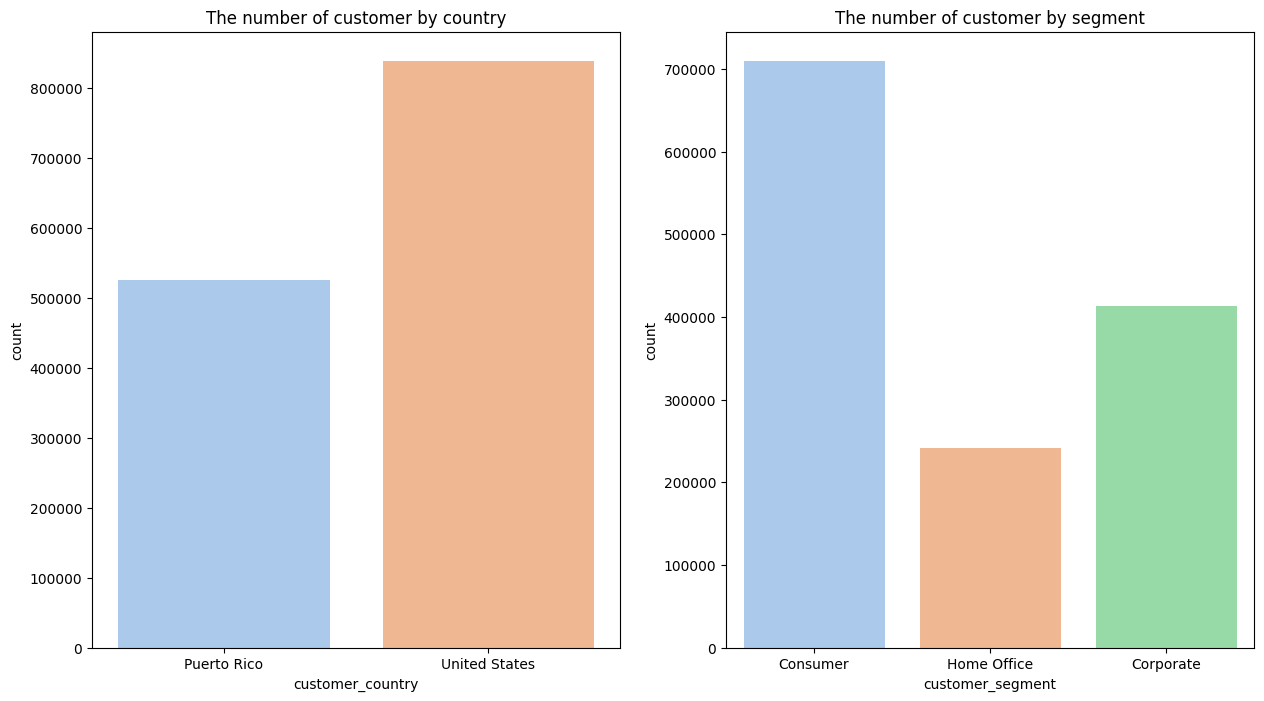

In [142]:
plt.figure(figsize=(15,8))

## Chart by country
plt.subplot(1,2,1)
sns.countplot(df, x='customer_country', palette='pastel')
plt.title('The number of customer by country')

## Chart by segment
plt.subplot(1,2,2)
sns.countplot(df, x='customer_segment', palette='pastel')
plt.title('The number of customer by segment')
plt.show()

**- Observations:**
- Looking at the chart, we can see that the number of customers in the `United States` and customers in the `Consumer` segment make up the largest proportion.

### The quantity of orders

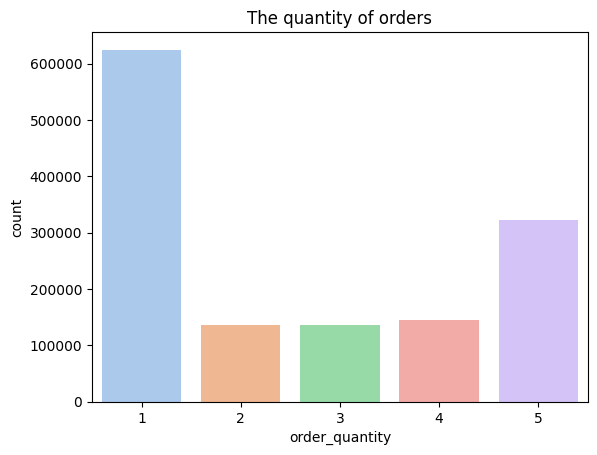

In [143]:
sns.countplot(df, x='order_quantity', palette='pastel')
plt.title('The quantity of orders')
plt.show()


**- Observations:**
- Each customer transaction mainly consists of a single order.

### Price of Product and Profit per product

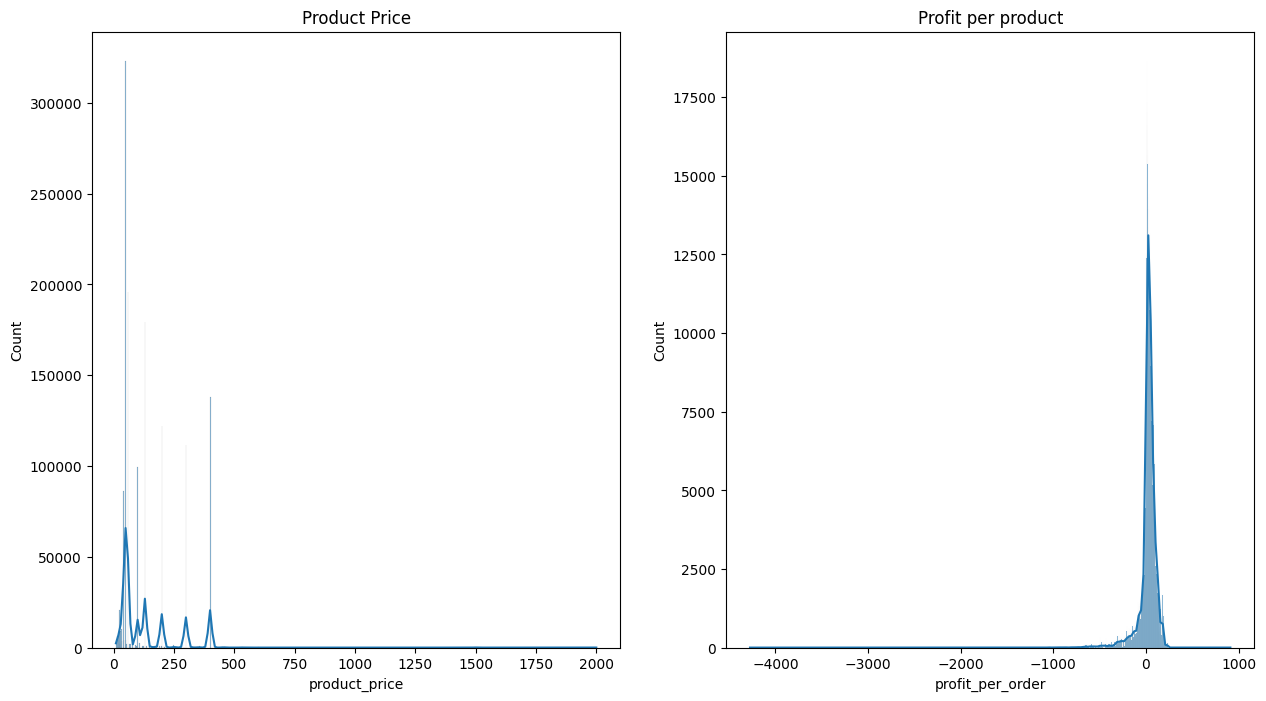

In [144]:
plt.figure(figsize=(15,8))

## Chart by country
plt.subplot(1,2,1)
sns.histplot(df['product_price'],kde=True)
plt.title('Product Price')

## Chart by segment
plt.subplot(1,2,2)
sns.histplot(df['profit_per_order'],kde=True)
plt.title('Profit per product')
plt.show()

- Because the business sells a variety of products, there is a significant price disparity

### Distribution of product price and profit

<Figure size 1000x600 with 0 Axes>

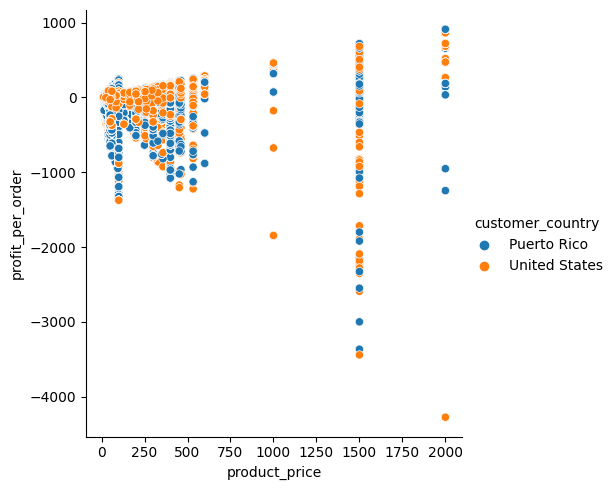

In [145]:
plt.figure(figsize=(10, 6))
sns.relplot(df,x = 'product_price', y= 'profit_per_order', hue='customer_country')
plt.show()

- For products priced below 500, the business seems to be unprofitable.
- For higher-priced products above 1000, there is some profit generated for the business, but it is not significant.
- The yellow points representing United States indicate that the business performance in this country is more favorable.


=> The business is focusing on the customer experience to attract more customers."

## Preprocessing

###  Check duplicate values

In [146]:
dup = df[df.duplicated()]
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248048 entries, 14 to 1363789
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_city           1248048 non-null  object 
 1   customer_country        1248048 non-null  object 
 2   customer_fname          1248048 non-null  object 
 3   customer_id             1248048 non-null  object 
 4   customer_segment        1248048 non-null  object 
 5   customer_state          1248048 non-null  object 
 6   customer_zipcode        1248048 non-null  object 
 7   additional_order_items  1236560 non-null  object 
 8   category_name           1248048 non-null  object 
 9   market                  1248048 non-null  object 
 10  order_date              1248048 non-null  object 
 11  order_id                1248048 non-null  object 
 12  order_region            1248048 non-null  object 
 13  order_quantity          1248048 non-null  int64  
 14  produc

### Missing Values

In [147]:
df.isna().sum()

customer_city                 0
customer_country              0
customer_fname                0
customer_id                   0
customer_segment              0
customer_state                0
customer_zipcode              3
additional_order_items    12512
category_name                 0
market                        0
order_date                    0
order_id                      0
order_region                  0
order_quantity                0
product_price                 0
profit_margin                 0
profit_per_order              0
dtype: int64

In [148]:
missing = df[~df['category_name'].isin(df['additional_order_items'])]
missing['category_name'].value_counts()

category_name
Accessories    12512
Name: count, dtype: int64

**- Observations:**
+ In the `customer_zipcode`, there are 3 rows of data that are null => drop the row data .
+ In `additional_order_items`, there are 12,512 rows of data that are null due to missing "Accessories" products.

In [149]:
## Drop columns
df = df.dropna(subset=['customer_zipcode'])
df.isnull().sum()

customer_city                 0
customer_country              0
customer_fname                0
customer_id                   0
customer_segment              0
customer_state                0
customer_zipcode              0
additional_order_items    12512
category_name                 0
market                        0
order_date                    0
order_id                      0
order_region                  0
order_quantity                0
product_price                 0
profit_margin                 0
profit_per_order              0
dtype: int64

### Outlier

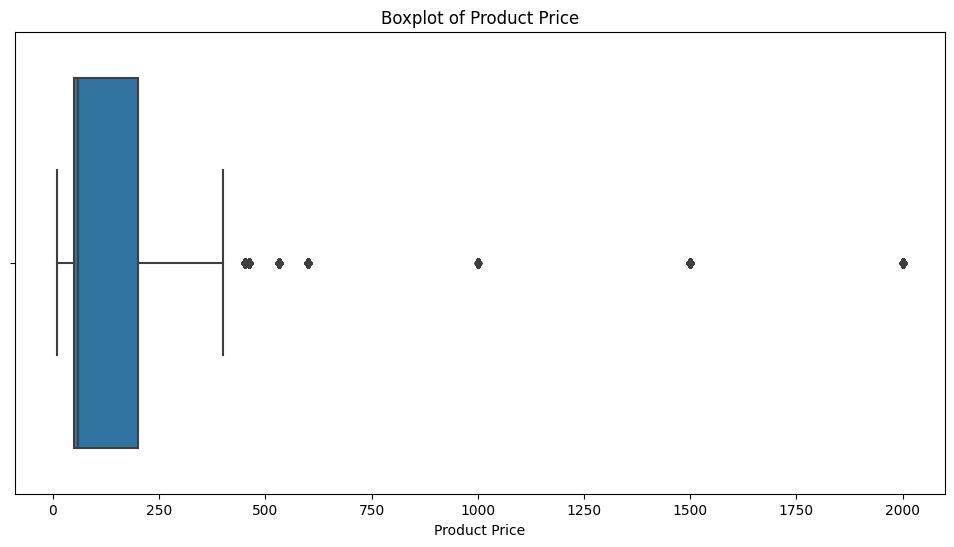

In [150]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['product_price'])
plt.title('Boxplot of Product Price')
plt.xlabel('Product Price')
plt.show()

In [151]:
percentile25=df['product_price'].quantile(0.25)
percentile75=df['product_price'].quantile(0.75)
iqr = percentile75-percentile25
iqr

149.9900055

In [152]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 424.97501375
Lower limit -174.98500825


In [153]:
new_df = df[df['product_price'] < upper_limit]
new_df.shape

(1361363, 17)

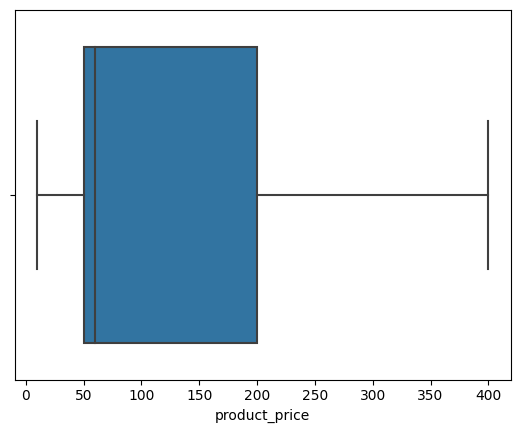

In [154]:
sns.boxplot(x = new_df['product_price'])
plt.show()

## Customer segmentation

### RFM Analysis

#### RFM Analysis (Recency, Frequency, Monetary Analysis)

1. Definition  
RFM Analysis is a customer segmentation technique that evaluates customers based on their purchasing behavior. It helps businesses identify high-value customers and tailor marketing strategies accordingly.  

2. RFM Components  
- **Recency (R):** How recently a customer made a purchase.  
- **Frequency (F):** How often a customer makes a purchase.  
- **Monetary (M):** How much money a customer spends.  


#### Calculate RFM Metrics

**Recency (R)**: Calculate the days since the customer's last purchase.

\[
Recency = {Current Date} - {Most Recent Purchase Date}
\]

**Frequency (F)**: Count the total number of purchases per customer.

\[
Frequency = {Total Number of Transactions per Customer}
\]

**Monetary (M)**: Sum of the total money spent by each customer.

\[
Monetary = \sum_{i=1}^{n} {Transaction Amount}_i
\]

where \( n \) is the total number of transactions made by the customer.


---

#### Assign RFM Scores

Rank customers into quintiles (1-5) for each metric:

- **Higher Recency Score (5)** → Purchased recently  
- **Higher Frequency Score (5)** → Buys frequently  
- **Higher Monetary Score (5)** → Spends a lot  

---

#### Segment Customers Based on RFM Scores

Based on the RFM scores customers can be categorized as:

| **Customer Segment**   | **Characteristics**                                |
|-----------------------|--------------------------------------------------|
| Best Customers        | Frequent, high-spending, recent buyers          |
| Loyal Customers       | Buy regularly but not the highest spenders      |
| Potential Loyalists   | Recent buyers but not very frequent            |
| At-Risk Customers     | Used to buy but haven’t in a while             |
| Lost Customers        | Haven't purchased for a long time              |


In [155]:
new_df.columns

Index(['customer_city', 'customer_country', 'customer_fname', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'additional_order_items', 'category_name', 'market', 'order_date',
       'order_id', 'order_region', 'order_quantity', 'product_price',
       'profit_margin', 'profit_per_order'],
      dtype='object')

In [156]:
new_df['order_date'] = pd.to_datetime(new_df['order_date'])
current_date = max(new_df['order_date']) + datetime.timedelta(days=1)

## Monetary Value
new_df['Total_price'] = new_df['product_price']*new_df['order_quantity']


df_customers = new_df.groupby(['customer_id']).agg(
    {'order_date': lambda x: (current_date - x.max()).days,
     'order_id': 'count',
     'Total_price': 'sum'}
)
df_customers

C:\Users\DELL\AppData\Local\Temp\ipykernel_17844\560027645.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df['order_date'] = pd.to_datetime(new_df['order_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_17844\560027645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['order_date'] = pd.to_datetime(new_df['order_date'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_17844\560027645.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,order_date,order_id,Total_price
customer_id,,,
2,106,81,40945.681001
3,199,225,89062.952703
4,350,36,8518.680222
5,427,49,8923.250241
6,616,9,1949.909981
...,...,...,...
18630,1,1,821.900024
18631,1,1,164.380005
18632,1,1,164.380005


In [157]:
df_customers.rename(columns={'order_date':'Recency','order_id':'Frequency','Total_price':'MonetaryValue'}, inplace=True)
df_customers

,Recency,Frequency,MonetaryValue
customer_id,,,
2,106,81,40945.681001
3,199,225,89062.952703
4,350,36,8518.680222
5,427,49,8923.250241
6,616,9,1949.909981
...,...,...,...
18630,1,1,821.900024
18631,1,1,164.380005
18632,1,1,164.380005


In [158]:
#Scaler data
scaler = StandardScaler()
scaler.fit(df_customers)
df_customers_normalized = scaler.transform(df_customers)
df_customers_normalized

array([[-0.67080483, -0.02890623,  0.4980163 ],
       [-0.10799453,  1.13625409,  1.81696808],
       [ 0.80581576, -0.39301883, -0.39084645],
       ...,
       [-1.30623582, -0.67621752, -0.61984778],
       [-1.30623582, -0.67621752, -0.61984778],
       [-1.30623582, -0.67621752, -0.61984778]])

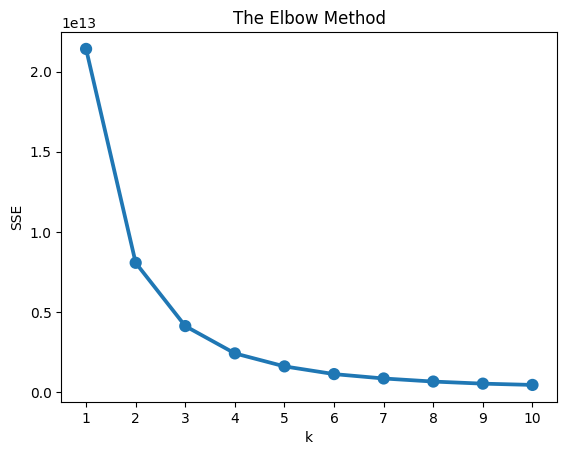

In [159]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

- Choose k = 4

### KMeans

In [160]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(df_customers_normalized)

KMeans(n_clusters=4, random_state=42)

In [161]:
df_customers['Cluster'] = kmeans.labels_
df_customers

,Recency,Frequency,MonetaryValue,Cluster
customer_id,,,,
2,106,81,40945.681001,1
3,199,225,89062.952703,3
4,350,36,8518.680222,2
5,427,49,8923.250241,2
6,616,9,1949.909981,2
...,...,...,...,...
18630,1,1,821.900024,1
18631,1,1,164.380005,1
18632,1,1,164.380005,1


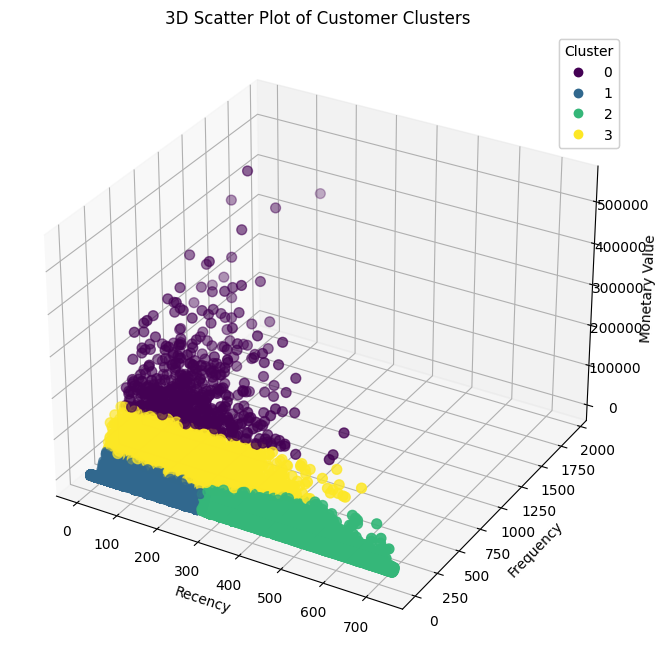

In [162]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_customers['Recency'], df_customers['Frequency'], df_customers['MonetaryValue'], 
                     c=df_customers['Cluster'], cmap='viridis', s=50)

# Adding titles and labels
ax.set_title('3D Scatter Plot of Customer Clusters')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

### Result

In [163]:
avg_df = df_customers.groupby(['Cluster'], as_index=False).mean()
avg_df

,Cluster,Recency,Frequency,MonetaryValue
0,0,142.161812,502.995146,151373.031969
1,1,115.085846,27.576543,7178.024191
2,2,429.432803,41.471043,8948.811476
3,3,178.078431,204.931373,55874.541323


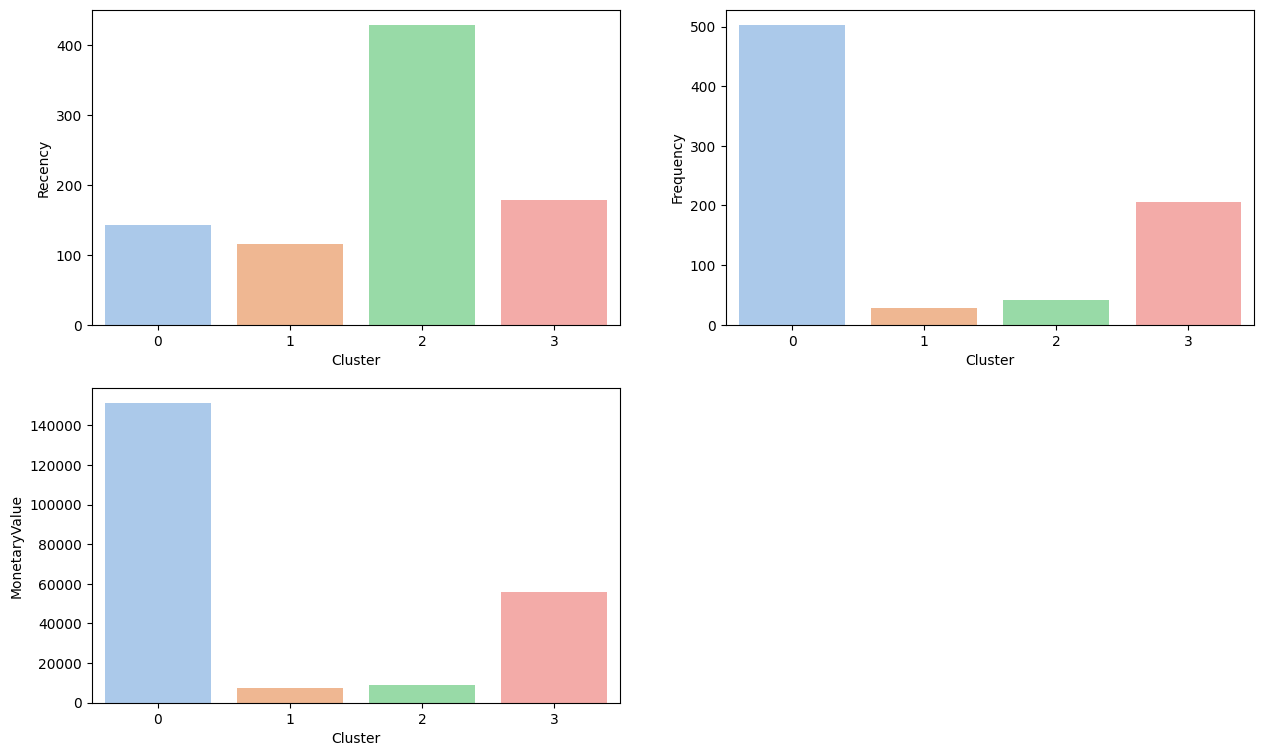

In [164]:
plt.figure(figsize=(15,9))


plt.subplot(2,2,1)
sns.barplot(avg_df,x='Cluster', y = 'Recency', palette='pastel')

plt.subplot(2,2,2)
sns.barplot(avg_df,x='Cluster', y = 'Frequency', palette='pastel')

plt.subplot(2,2,3)
sns.barplot(avg_df,x='Cluster', y = 'MonetaryValue', palette='pastel')
plt.show()

### Conclusion 

- Cluster 0 contains your most valuable customers who purchase frequently and spend the most.
- Cluster 1 includes new or infrequent buyers, who might need engagement strategies (discounts, follow-ups).
- Cluster 2 represents at-risk customers who haven’t purchased in a while. You can target them with retention campaigns.
- Cluster 3 includes loyal customers with high spending potential but slightly lower than Cluster 0.